# Myopia Clusters 

A medical research company is interested in finding better ways to predict myopia, or nearsightedness. 

## Importing Dependencies

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation 

In [28]:
# Read in CSV and view
myopia_df = pd.read_csv("myopia.csv")
labels = myopia_df["MYOPIC"]
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [29]:
# Drop 'MYOPIC' column and view to check
myopia_df = myopia_df.drop(columns=["MYOPIC"])
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [30]:
# Viewing shape
myopia_df.shape

(618, 14)

In [31]:
# Standardise the data using StandardScaler
scaler = StandardScaler()

# Rename df
X = scaler.fit_transform(myopia_df)

In [7]:
# Check to see if data has scaled 
X[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

## Dimensionality Reduction

In [8]:
# Dimensionality reduction with PCA
pca = PCA(n_components=0.9)

# Principal components
# Direction in which the samples vary the most (displacement from the mean)
pca_X = pca.fit_transform(X)

In [9]:
pca_X.shape

(618, 10)

The dimensions have been reduced by 4. This means there are 10 features with the highest variance. They are more distinct (infomative), PCA has reduced the noisy features.

In [10]:
pca_X[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

In [11]:
# View shape of the new dataset
pca.explained_variance_

array([2.96963488, 2.19591352, 1.21829455, 1.16413033, 1.0636011 ,
       0.9812908 , 0.90965003, 0.89434022, 0.75633707, 0.72996042])

In [12]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [13]:
pca.explained_variance_ratio_.sum()

0.9187361702915188

C:\Users\shann\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


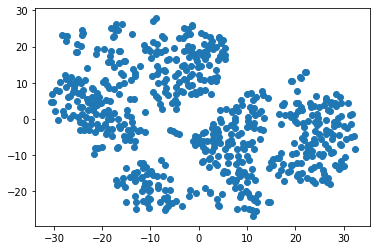

In [33]:
# t-SNE model to further reduce the dataset dimensions 
# Crate a TSNE instance
model_t = TSNE(learning_rate=200)

# Apply fit transform 
tsne_features = model_t.fit_transform(pca_X)
xs = tsne_features[:,0]
ys = tsne_features[:,1]

# Create a scatter plot of the t-SNE output. Are there distinct clusters?
# c=labels
plt.scatter(xs,ys)
plt.show()

After chagning the learning rate a couple of times the clusters became more distinct, however, they are not overly clear. The t-SNE visualisation suggests that there may be 3 or 4 clusters.

## Cluster Analysis using K-Means

In [44]:
# create pca_X df to plot kmeans
pca_X_df = pd.DataFrame(data=pca_X)
pca_X_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


C:\Users\shann\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


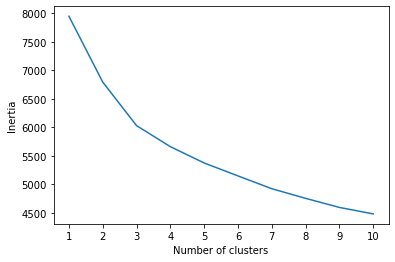

In [35]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_X)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
# If possible, determine where the elbow of the plot is, and at which value of k it appears.

There is no clear optimal number of clusters. The elbow of the plot seems to rest at 3 but is not clear and seems to be within 3 and 5. I will plot the kmeans below to see if this is more enlightening. 

In [49]:
# k-means clustering with 3 clusters 
# Create k-means instance 
model_k = KMeans(n_clusters=3, random_state=5)

# Fit 
model_k.fit(pca_X)

# Cluster predictions
predictions = model_k.predict(pca_X)

# Add new class to elbow df 
pca_X_df["class"] = model_k.labels_

pca_X_df.head()

,0,1,2,3,4,5,6,7,8,9,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


<function matplotlib.pyplot.show(close=None, block=None)>

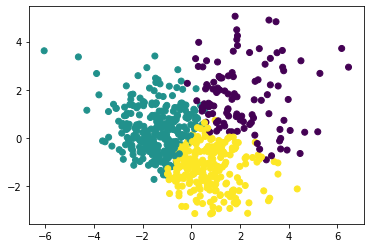

In [59]:
plt.scatter(x=pca_X_df[0], 
            y=pca_X_df[1], 
            c=pca_X_df["class"])
plt.show

In [61]:
# k-means clustering with 4 clusters 
# k-means clustering with 3 clusters 
# Create k-means instance 
model_k_4 = KMeans(n_clusters=4, random_state=5)

# Fit 
model_k_4.fit(pca_X)

# Cluster predictions
predictions = model_k_4.predict(pca_X)

# Add new class to elbow df 
pca_X_df["class4"] = model_k_4.labels_

pca_X_df.head()

,0,1,2,3,4,5,6,7,8,9,class,class4
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

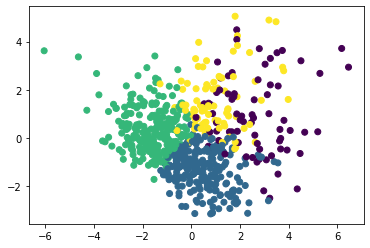

In [62]:
plt.scatter(x=pca_X_df[0], 
            y=pca_X_df[1], 
            c=pca_X_df["class4"])
plt.show

## Conclusion  

The visualistions using t-SNE and K-means suggests that the patients can be split into 3 clusters. The t-SNE visualisation suggested that there may be 3 to 4 clusters. The elbow plt showed that the optimal number of clusters may be around 3 and then the k-means plot supported the 3 clusters.